In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
(data, _), (_, _) = keras.datasets.cifar10.load_data()
np.random.shuffle(data)
data = data[:200]
data = data/255 - 0.5

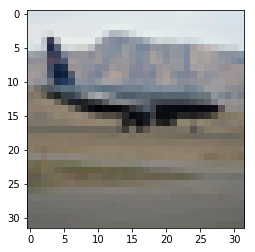

In [3]:
plt.imshow(data[np.random.randint(0,len(data))] + 0.5, cmap='gray')
plt.show()

In [4]:
keys = np.random.randn(*data.shape) + np.random.randn(*data.shape)*1j
keys = np.reshape(keys, (data.shape[0],-1)) / 2**0.5

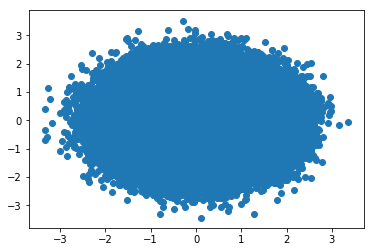

In [5]:
plt.scatter(np.real(keys), np.imag(keys))
plt.show()

In [6]:
ps = []
for i in range(1000):
    p = np.arange(data.shape[1]*data.shape[2]*data.shape[3])
    np.random.shuffle(p)
    ps.append(p)
ps = np.array(ps)

In [7]:
cs = np.array([np.sum(np.reshape(keys[:,p],data.shape) * data, axis=0) for p in ps])

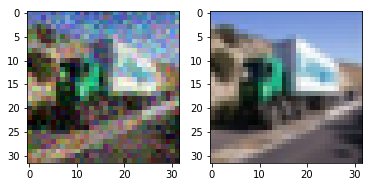

In [10]:
i = np.random.randint(0,len(data))
y = np.array([
    np.conj(np.reshape(keys[i,p],data.shape[1:]))*c
    for p,c in zip(ps,cs)])
y = np.real(y)
y = np.mean(y, axis=0)
y = np.clip(np.tanh(y) + 0.5, 0, 1)
plt.subplot(1,2,1)
plt.imshow(y, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(data[i] + 0.5, cmap='gray')
plt.show()